In [2]:
import requests
import json
import re

files_endpt = "https://api.gdc.cancer.gov/files"
filters = {
    "op": "and",
    "content":[
        {
            "op":"in",
            "content":{
                "field":"files.data_category",
                "value":"DNA Methylation"
            }
        },
        {
            "op": "in",
            "content":{
                "field": "cases.project.project_id",
                "value": "TCGA-BRCA"
                }
        },
                {
            "op": "in",
            "content":{
                "field": "files.platform",
                "value": "illumina human methylation 450"
                }
        }
    ]
}
params = {
    "filters": json.dumps(filters),
    "fields": "file_id",
    "format": "JSON",
    "size": "1"
    }
response = requests.get(files_endpt, params = params)

file_uuid_list = []

# This step populates the download list with the file_ids from the previous query
for file_entry in json.loads(response.content.decode("utf-8"))["data"]["hits"]:
    file_uuid_list.append(file_entry["file_id"])

file_uuid_list = file_uuid_list[:1]  

data_endpt = "https://api.gdc.cancer.gov/data"

params = {"ids": file_uuid_list}

print('here')
print(params)
print(file_uuid_list)
response = requests.post(data_endpt, data = json.dumps(params), headers = {"Content-Type": "application/json"})

response_head_cd = response.headers["Content-Disposition"]

file_name = re.findall("filename=(.+)", response_head_cd)[0]

with open(file_name, "wb") as output_file:
    output_file.write(response.content)

here
{'ids': ['70bccc18-d302-4cb3-a089-b5ad38c9d3a6']}
['70bccc18-d302-4cb3-a089-b5ad38c9d3a6']


In [5]:
!ls

jhu-usc.edu_BRCA.HumanMethylation450.5.lvl-3.TCGA-A2-A0YT-01A-11D-A10A-05.gdc_hg38.txt
methylation_exploration.ipynb


In [7]:
!ls -alh

total 135M
drwxr-xr-x 3 dufaultc dufaultc 4.0K Nov 18 20:09 .
drwxr-xr-x 8 dufaultc dufaultc 4.0K Nov 18 19:44 ..
drwxr-xr-x 2 dufaultc dufaultc 4.0K Nov 18 20:03 .ipynb_checkpoints
-rw-r--r-- 1 dufaultc dufaultc 135M Nov 18 20:09 jhu-usc.edu_BRCA.HumanMethylation450.5.lvl-3.TCGA-A2-A0YT-01A-11D-A10A-05.gdc_hg38.txt
-rw-r--r-- 1 dufaultc dufaultc 2.8K Nov 18 20:07 methylation_exploration.ipynb


In [1]:
f = open('jhu-usc.edu_BRCA.HumanMethylation450.5.lvl-3.TCGA-A2-A0YT-01A-11D-A10A-05.gdc_hg38.txt','r')

In [2]:
out = f.readlines()

In [3]:
len(out)

485578

In [7]:
out[:2]

['Composite Element REF\tBeta_value\tChromosome\tStart\tEnd\tGene_Symbol\tGene_Type\tTranscript_ID\tPosition_to_TSS\tCGI_Coordinate\tFeature_Type\n',
 'cg00000029\t0.112936637414843\tchr16\t53434200\t53434201\tRBL2;RBL2;RBL2\tprotein_coding;protein_coding;protein_coding\tENST00000262133.9;ENST00000544405.5;ENST00000567964.5\t-221;-1420;222\tCGI:chr16:53434489-53435297\tN_Shore\n']

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('jhu-usc.edu_BRCA.HumanMethylation450.5.lvl-3.TCGA-A2-A0YT-01A-11D-A10A-05.gdc_hg38.txt', sep='\t')

In [9]:
df['Beta_value'].value_counts()

0.034056    3
0.018132    3
0.257315    3
0.897423    3
0.853040    3
           ..
0.343381    1
0.355937    1
0.872608    1
0.018248    1
0.686626    1
Name: Beta_value, Length: 394566, dtype: int64

In [8]:
df.head(100).iloc[0]['Transcript_ID']

'ENST00000262133.9;ENST00000544405.5;ENST00000567964.5'

In [6]:
df.head(20)

,Composite Element REF,Beta_value,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
0,cg00000029,0.112937,chr16,53434200,53434201,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-221;-1420;222,CGI:chr16:53434489-53435297,N_Shore
1,cg00000108,NaN,chr3,37417715,37417716,C3orf35;C3orf35;C3orf35;C3orf35;C3orf35;C3orf3...,lincRNA;lincRNA;lincRNA;lincRNA;lincRNA;lincRN...,ENST00000328376.8;ENST00000332506.6;ENST000004...,18552;18552;6505;31445;18143;447;18552;18552,CGI:chr3:37451927-37453047,.
2,cg00000109,NaN,chr3,172198247,172198248,FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B,protein_coding;protein_coding;protein_coding;p...,ENST00000336824.7;ENST00000415807.5;ENST000004...,157692;158618;151333;71272;158587;71273,CGI:chr3:172039703-172040934,.
3,cg00000165,0.179553,chr1,90729117,90729118,.,.,.,.,CGI:chr1:90724932-90727247,S_Shore
4,cg00000236,0.893608,chr8,42405776,42405777,VDAC3,protein_coding,ENST00000022615.7,13872,CGI:chr8:42410918-42411241,.


In [8]:
df[df['Gene_Symbol'].contains("RBL2")== True]

AttributeError: 'Series' object has no attribute 'contains'

In [62]:
df[df['Gene_Symbol'].apply(lambda x: "PLXNC1" in x)]

,Composite Element REF,Beta_value,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
503,cg00020799,0.122104,chr12,94171316,94171317,PLXNC1;PLXNC1;PLXNC1;RP11-74K11.2;RP11-74K11.2,protein_coding;protein_coding;protein_coding;a...,ENST00000258526.7;ENST00000546733.1;ENST000005...,22592;20483;13214;14729;5089,CGI:chr12:94186880-94187098,.
13429,cg00631877,NaN,chr12,94246897,94246898,PLXNC1;PLXNC1,protein_coding;protein_coding,ENST00000258526.7;ENST00000549810.1,98173;-1466,CGI:chr12:94186880-94187098,.
29414,cg01414289,0.011362,chr12,94148214,94148215,PLXNC1,protein_coding,ENST00000258526.7,-510,CGI:chr12:94147951-94150224,Island
56169,cg02757998,NaN,chr12,94153157,94153158,PLXNC1;PLXNC1,protein_coding;protein_coding,ENST00000258526.7;ENST00000546733.1,4433;2324,CGI:chr12:94147951-94150224,S_Shelf
81329,cg04048411,0.014960,chr12,94148167,94148168,PLXNC1,protein_coding,ENST00000258526.7,-557,CGI:chr12:94147951-94150224,Island
84344,cg04199354,NaN,chr12,94262159,94262160,PLXNC1;PLXNC1;PLXNC1;PLXNC1;PLXNC1,protein_coding;protein_coding;protein_coding;p...,ENST00000258526.7;ENST00000545312.1;ENST000005...,113435;-363;7630;7680;2772,CGI:chr12:94186880-94187098,.
96182,cg04822495,0.182330,chr12,94282912,94282913,PLXNC1;PLXNC1;PLXNC1;PLXNC1;RP11-1105G2.3,protein_coding;protein_coding;protein_coding;p...,ENST00000258526.7;ENST00000545312.1;ENST000005...,134188;20390;28383;28433;-67,CGI:chr12:94186880-94187098,.
102253,cg05136471,NaN,chr12,94184061,94184062,PLXNC1;PLXNC1;PLXNC1;RP11-74K11.2,protein_coding;protein_coding;protein_coding;a...,ENST00000258526.7;ENST00000546733.1;ENST000005...,35337;33228;25959;1984,CGI:chr12:94186880-94187098,N_Shelf
128575,cg06595153,0.574214,chr12,94225860,94225861,PLXNC1;PLXNC1,protein_coding;protein_coding,ENST00000258526.7;ENST00000546659.1,77136;-630,CGI:chr12:94186880-94187098,.
140844,cg07200939,0.197050,chr12,94305365,94305366,PLXNC1;PLXNC1;PLXNC1,protein_coding;protein_coding;protein_coding,ENST00000258526.7;ENST00000545312.1;ENST000005...,156641;42843;50836,CGI:chr12:94186880-94187098,.


In [15]:
df[df['Gene_Symbol'] == "RBL2;RBL2;RBL2"].loc[0]["Transcript_ID"]

'ENST00000262133.9;ENST00000544405.5;ENST00000567964.5'

In [16]:
df[df['Gene_Symbol'] == "RBL2;RBL2;RBL2"]

,Composite Element REF,Beta_value,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
0,cg00000029,0.112937,chr16,53434200,53434201,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-221;-1420;222,CGI:chr16:53434489-53435297,N_Shore
266,cg00011284,0.045591,chr16,53435432,53435433,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,1011;-188;1454,CGI:chr16:53434489-53435297,S_Shore
21389,cg01016459,0.048007,chr16,53435048,53435049,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,627;-572;1070,CGI:chr16:53434489-53435297,Island
41470,cg02021817,0.052120,chr16,53434238,53434239,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-183;-1382;260,CGI:chr16:53434489-53435297,N_Shore
43503,cg02119764,0.018977,chr16,53435613,53435614,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,1192;-7;1635,CGI:chr16:53434489-53435297,S_Shore
57944,cg02851944,0.057008,chr16,53434213,53434214,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-208;-1407;235,CGI:chr16:53434489-53435297,N_Shore
60645,cg02976952,0.015243,chr16,53434438,53434439,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,17;-1182;460,CGI:chr16:53434489-53435297,N_Shore
79308,cg03943270,0.090690,chr16,53434293,53434294,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-128;-1327;315,CGI:chr16:53434489-53435297,N_Shore
144421,cg07396495,0.043505,chr16,53434804,53434805,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,383;-816;826,CGI:chr16:53434489-53435297,Island
227871,cg12190057,0.030416,chr16,53435129,53435130,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,708;-491;1151,CGI:chr16:53434489-53435297,Island


In [3]:
! aws s3 sync s3://test-bucket-project-x ./

^C


In [55]:
##Determining the gene with the highest amount of cpg sites

#First building set of all gene
import tqdm
gene_list = set()
for i in tqdm.tqdm(range(df.shape[0])):
    for j,x in enumerate(df.iloc[i]['Gene_Symbol'].split(';')): 
        if (df.iloc[i]['Gene_Type'].split(';')[j] == 'protein_coding'):
            gene_list.add(x)
    

100%|██████████| 485577/485577 [08:21<00:00, 968.23it/s] 


In [59]:
gene_dict = dict.fromkeys(gene_list,0)

In [60]:
inc_func = lambda x : x + 1
for i in tqdm.tqdm(range(df.shape[0])):
    temp_set= set(df.iloc[i]['Gene_Symbol'].split(';'))
    for x in list(temp_set):        
        if x in gene_dict.keys():
            gene_dict[x]+= 1

100%|██████████| 485577/485577 [01:37<00:00, 4968.33it/s]


In [61]:
gene_dict


{'HEXIM2': 21,
 'SRSF3': 19,
 'NWD2': 18,
 'TRIM60': 13,
 'NMB': 18,
 'WDHD1': 14,
 'TMEM100': 14,
 'SLC26A1': 41,
 'AARS': 22,
 'CCDC58': 14,
 'INCENP': 22,
 'TCF7': 24,
 'STAC': 15,
 'SPATA5L1': 16,
 'FRMPD1': 7,
 'PGPEP1L': 22,
 'CNTN5': 26,
 'KIR3DL3': 5,
 'NEUROG1': 31,
 'INHA': 20,
 'CFAP52': 17,
 'SLAMF7': 5,
 'ARHGAP21': 16,
 'GAS2L3': 12,
 'RANBP1': 20,
 'LRMP': 8,
 'RFNG': 14,
 'CACNB3': 18,
 'C21orf59': 14,
 'RP11-574F21.3': 32,
 'ZNF582': 14,
 'KCNIP2': 34,
 'C7orf26': 14,
 'TREX2': 29,
 'LSMEM1': 14,
 'DDX58': 7,
 'ATXN7L1': 72,
 'HOXB4': 34,
 'ATP6V1B2': 15,
 'PPP1R12C': 20,
 'TYRP1': 3,
 'LASP1': 34,
 'ARHGAP32': 28,
 'TSSK3': 25,
 'C1orf27': 20,
 'SMDT1': 13,
 'ATP5B': 17,
 'BNIP1': 14,
 'CERK': 19,
 'ABCC2': 19,
 'TRAF4': 16,
 'RAD23B': 12,
 'LZTFL1': 31,
 'CRNKL1': 20,
 'AMY2B': 7,
 'SPECC1': 70,
 'ZDHHC6': 20,
 'TRIM58': 15,
 'GNL3L': 15,
 'DCUN1D1': 15,
 'GCNT7': 16,
 'H2AFX': 13,
 'PCNXL4': 30,
 'EEF1D': 35,
 'DUSP28': 11,
 'HES1': 32,
 'PDZD7': 30,
 'ANKLE1': 17,


In [53]:
gene_dict

{}

In [63]:
max(gene_dict,key=gene_dict.get)

'PTPRN2'

In [41]:
gene_dict.pop('.')

75317

In [64]:
gene_dict['PTPRN2']

1280

In [71]:
c = pd.Series(sorted(gene_dict.values(),reverse=True)).value_counts()

<AxesSubplot:>

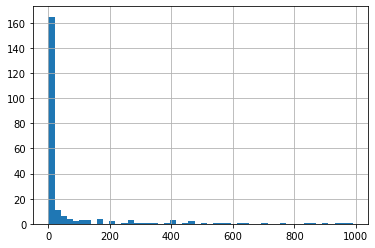

In [76]:
c.hist(bins = 50)